## Асимптотическая нормальность

__________________
**Задача 1.** В этой задаче нужно визуализировать *свойство асимптотической нормальности*.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U(0, 1)$. Согласно центральной предельной теореме оценка $\theta^* = 2\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$.  Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n = \sqrt{n} \left( 2\overline{X} - \theta \right)$ в зависимости от размера набора. 

Сгенерируйте множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leq j \leq 300$.<br> 
По каждой из них посчитайте оценки  $\theta^*_{jn} = 2\frac{X^j_1 + \dots + X^j_n}{n}$ для $1 \leq n \leq 500$,  то есть оценку параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки.
Для этих оценок посчитайте статистики $Z_{jn} = \sqrt{n} \left( \theta^*_{jn} - \theta \right)$, где $\theta = 1$.

In [1]:
try:
    import  numpy as np
    import scipy.stats as sps
    import seaborn as sns
    import matplotlib.pyplot as plt
except ImportError as imp:
    print("importerror  occured")
%matplotlib inline

In [2]:
sample = []*(10**4) # generating sample
theta = 1
unif = sps.uniform(loc = 0,scale = theta) # we create the uniform distribution
sample = unif.rvs(size = 10000) # we add data
sample.shape

(10000,)

### 1. Посчитаем оценку

In [8]:
estimator =  [0] 
n = 1
res_sum = sample[0]
for x in sample:
    if(estimator[0] == 0):
        estimator[0] = 2 * x
        n+=1
    else:
        res_sum += x
        current = 2 * (res_sum)/n
        estimator.append(current)
        n+=1

In [10]:
estimator

[1.8065630952099712,
 1.7919582436278712,
 1.617333717002591,
 1.5673943244697686,
 1.4784301015601879,
 1.3329825203628962,
 1.4189421420003414,
 1.2774030549098194,
 1.3025370175261652,
 1.3554786459763666,
 1.3877348714659019,
 1.4046369931959146,
 1.3990112671973747,
 1.3784861829788506,
 1.3268337122407501,
 1.2978018310119586,
 1.2753055383450806,
 1.2531356736190706,
 1.2623326337907408,
 1.2784478603483234,
 1.2645477415401591,
 1.2393045852701148,
 1.19314966429069,
 1.1462874114443418,
 1.1641379709166717,
 1.1288313484900432,
 1.1586670960870498,
 1.1202450686454497,
 1.0824221470507569,
 1.1113328319507472,
 1.0794384915394983,
 1.093766305495919,
 1.0724533250373733,
 1.0974005297318399,
 1.0864412535916823,
 1.0981237081174688,
 1.1220153645538327,
 1.1085241693355274,
 1.1027163080083733,
 1.0926869665975656,
 1.0669692633671166,
 1.0521061001949872,
 1.0442731268521859,
 1.0275039262240038,
 1.0180835560178425,
 0.99868209096882532,
 0.98345940946051502,
 0.996317624853

In [11]:
stat_1 = list()
n = list()
for i in range(10**4):
    stat_1.append(estimator[i] - theta)
    n.append(i)

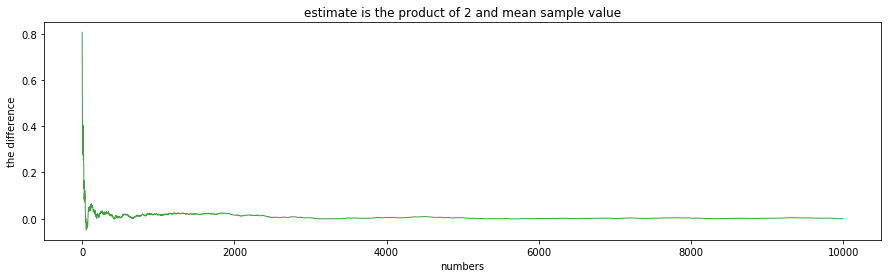

In [14]:
plt.figure(figsize = (15,4))
plt.plot(n,stat_1,'g-', lw=1,alpha=0.75)
plt.xlabel("numbers")
plt.ylabel("the difference")
plt.title("estimate is the product of 2 and mean sample value")
plt.legend()
plt.show()

### 2.Непосредственное построение асимптотической нормальности

Теперь непосредственно мы можем посчитаь левую часть для многомерной центральной предельной теоремы

In [22]:
import math
math.sqrt(4)

2.0

In [23]:
asympth = [0]
n = 1
res_sum = sample[0]
for x in sample:
    if(asympth[0] == 0):
        current = math.sqrt(n)*(2*x - theta)
        asympth[0] = current
        n+=1
    else:
        res_sum += x
        current = math.sqrt(n)*(2*(res_sum/n) - theta)
        asympth.append(current)
        n+=1

In [24]:
stat_2 = list() # Z_n
n = list()
for i in range(10**4):
    stat_2.append(asympth[i])
    n.append(i)

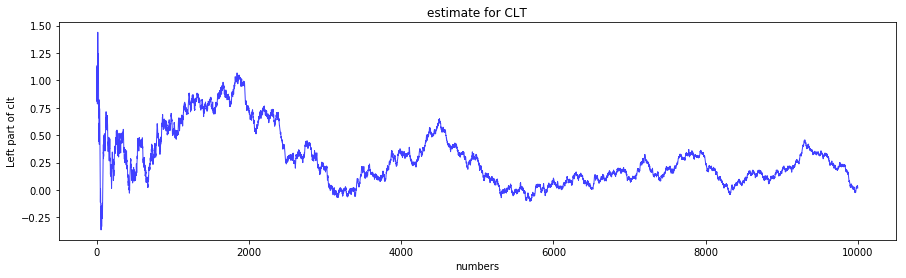

In [26]:
plt.figure(figsize = (15,4))
plt.plot(n,stat_2,'b-', lw=1,alpha=0.75)
plt.xlabel("numbers")
plt.ylabel("Z_n")
plt.title("estimate for CLT")
plt.legend()
plt.show()

Теперь мы с вами мы имеем список stat_2 , который хранит в себе значения левой части многомерной центральной предельной теоремы

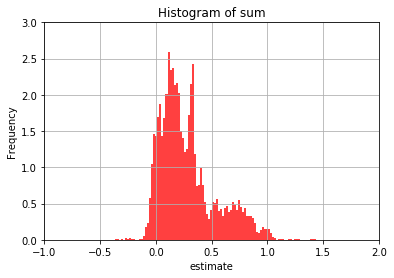

In [36]:
n, bins, patches = plt.hist(stat_2, 100, density=True, facecolor='r', alpha=0.75)
plt.xlabel('estimate')
plt.ylabel('Frequency')
plt.title('Histogram of sum')
plt.axis([-1, 2, 0, 3])
plt.grid(True)
plt.show()

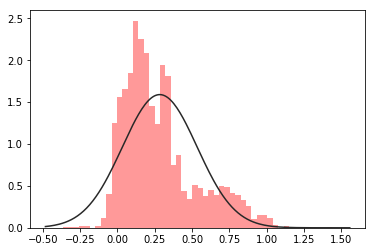

In [37]:
sns.distplot(stat_2, kde = False, fit = sps.norm ,color='red');

Теперь мы с вами сгенерируем 500 выборок из равномерного распределения , размером которых 300 объектов

In [43]:
new_sample = np.random.uniform(0, 1, (300, 500))

In [48]:
i = 0
z_n = np.random.uniform(0, 1, (300, 500)) 
for x in new_sample:
    n = 1
    asympth = [0]
    res_sum = x[0]
    for y in x:
        if(asympth[0] == 0):
            asympth[0] = math.sqrt(n)*(2*y - theta)
            n+=1
        else:
            res_sum += y
            asympth.append(math.sqrt(n)*(2*(res_sum/n) - theta))
            n += 1
            
    z_n[i] = asympth
    i += 1

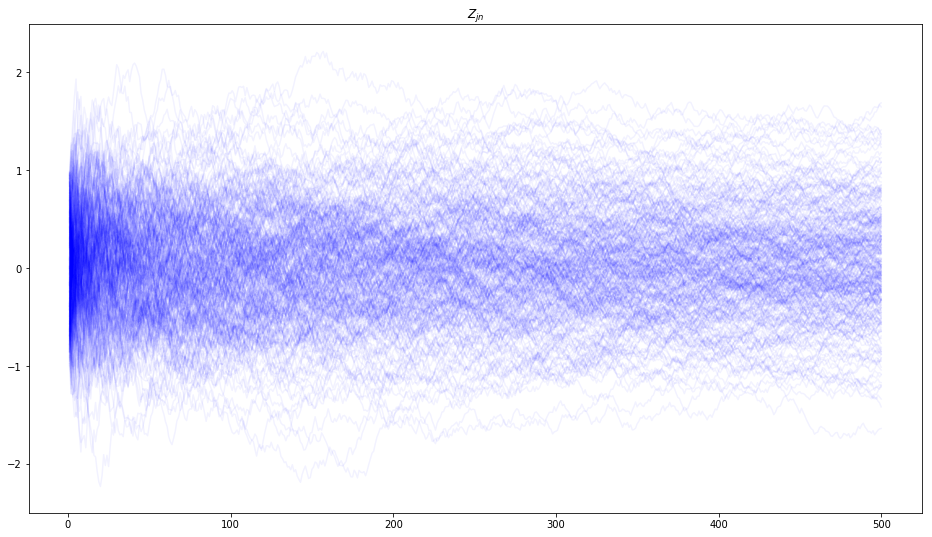

In [49]:
def ploting_Z ():
    plt.figure(figsize = (16, 9))
    plt.title("$Z_{jn}$")
    
    for i in range(300):
        plt.plot(np.arange(500) + 1, z_n[i], color = "blue", alpha = 0.05)
    
    plt.ylim(-2.5, 2.5)
    plt.legend()
    plt.show()
    return

ploting_Z ()